<a href="https://colab.research.google.com/github/Fuad3004/ANN-Artificial_Neural_Network/blob/main/ANN_2__(Classifying)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn  as nn

import matplotlib.pyplot as plt


#DATA Preparation

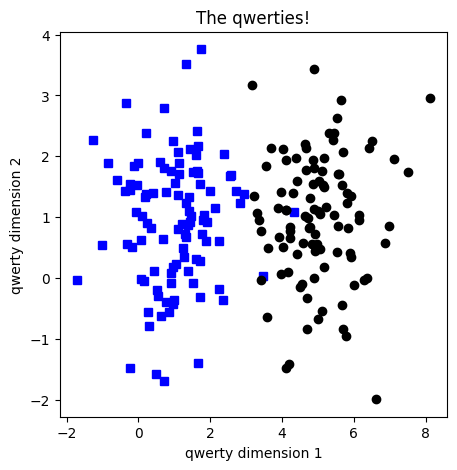

In [2]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))


# concatanate into a matrix
data_np = np.hstack((a,b)).T


# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))


<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


#Train Model Function

In [14]:
def train_model(x,y):

  ANNclassifying= nn.Sequential(
      nn.Linear(2,1),
      nn.ReLU(),
      nn.Linear(1,1),
      nn.Sigmoid(),
  )

  loss_fn = nn.BCELoss()
  optimizer= torch.optim.SGD(ANNclassifying.parameters(),lr=0.01)

  epochs =1000
  losses= torch.zeros(epochs)

  for epoch in range(epochs):

    #Foeward pass
    yHat= ANNclassifying(x)


    #Calcualte the loss
    loss= loss_fn(yHat, y)
    losses[epoch]=loss


    #BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  prediction=ANNclassifying(x)

  return prediction.detach(),losses



#testing


In [15]:
x=data
y=labels

In [16]:
# run the model
yHat,losses = train_model(x,y)
yHat = yHat.detach()


#Plot

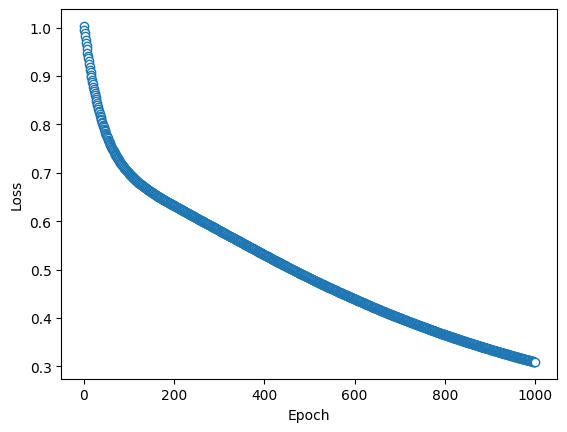

In [17]:
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [18]:
predlabels = yHat.detach()>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 93%


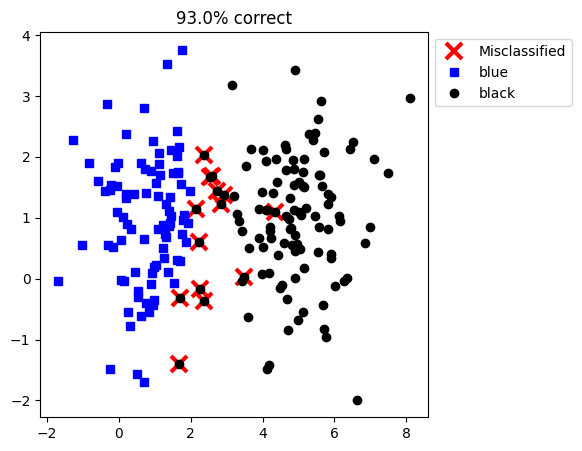

In [19]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()
